In [3]:
from manim import *
import jupyter_capture_output

video_scene = " -v WARNING --progress_bar None --disable_caching et_Scene"
image_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s et_Scene"

In [71]:
# view data
physics_view_data = [
    (-1, 3),
    (-1, 3),
    (-1, 3),
    (-1, 3),
    (-1, 2),
    (0, 4),
    (0, 4),
    (0, 5),
    (8, 8),
    (9, 8),
    (10, 8),
    (9, 9),
    (10, 9),
    #(10, 8),
    (9, 9),
    (10, 9),
    (9, 8),
    (9, 8),
    (11, 0),
    (12, 0),
    (12, 0),
    (12, 0),
    (-1, 8),
    (-1, 8),
    (-1, 8),
    (-1, 9),
    (-1, 9),
    (0, 8),
    (9, -1),
    (9, -1),
    (9, 0),
    (9, 0),
    (9, -1),
    (10, -1),
    (9, 0),
    (10, 0),
]


economics_view_data = [
    (6, 5),
    (2, 5),
    (0, 3),
    (0, 1),
    (3, 5),
    (6, 5),
    (1, 5),
    (1, 4),
    (5, -1),
    (3, -1),
    (6, 4),
    (0, 5),
    (1, 3),
    (2, 5),
    (-1, 2),
    (-1, 3),
    (-1, 3),
    (-1, 4),
    (-1, 6),
    (-1, 6),
    (-1, 1),
]

Output saved by creating file at animations/eye_tracking_2/eye_tracking_2.mp4.


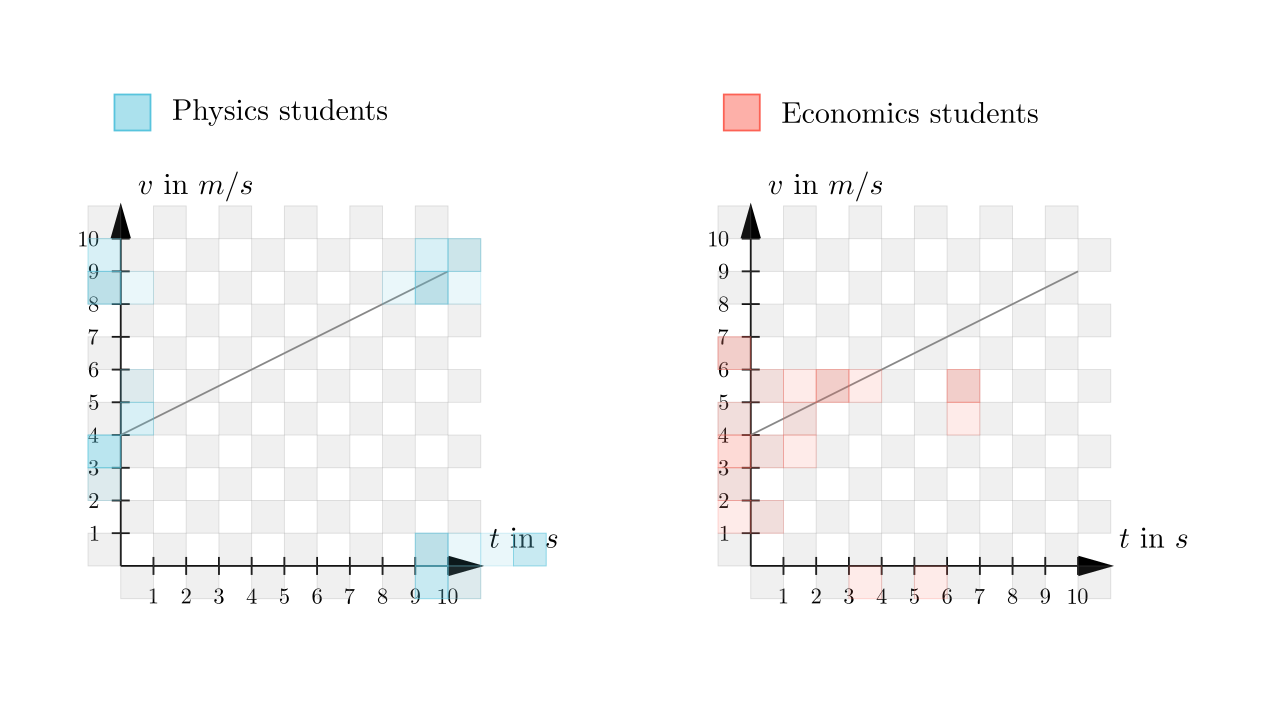

In [76]:
%%capture_video --path "animations/eye_tracking_2/eye_tracking_2.mp4"
%%manim -qm --fps 60 $video_scene


class et_Scene(Scene):
    def construct(self):
        self.camera.background_color=WHITE

        x_range = [0, 11, 1]
        y_range = [0, 11, 1]

        ax1_base = np.array([-4, -0.5, 0])
        ax2_base = np.array([3, -0.5, 0])
        ax_merge_base = np.array([-0.5, -0.5, 0])


        # description headline
        text_a = Tex(r'Physics students', font_size = 32, color = BLACK).move_to(ax1_base + 3.25*UP)
        text_b = Tex(r'Economics students', font_size = 32, color = BLACK).move_to(ax2_base + 3.25*UP)
        text_a_square = Square(color = BLUE, fill_opacity = 0.5, stroke_opacity = 1, side_length = 0.4, stroke_width = 2).next_to(text_a, LEFT)
        text_b_square = Square(color = RED, fill_opacity = 0.5, stroke_opacity = 1, side_length = 0.4, stroke_width = 2).next_to(text_b, LEFT)
        

        # axes
        ax1_ax = Axes(x_range = x_range, y_range = y_range, x_length = 4, y_length = 4, axis_config = {"font_size": 24, "tip_width": 0.2}).add_coordinates().move_to(ax1_base).set_color(BLACK)
        ax1_xlabel = ax1_ax.get_x_axis_label(Tex(r"$t$ in $s$", color = BLACK, font_size = 32))
        ax1_ylabel = ax1_ax.get_y_axis_label(Tex(r"$v$ in $m/s$", color = BLACK, font_size = 32))
        ax1 = VGroup(ax1_ax, ax1_xlabel, ax1_ylabel)

        ax2_ax = Axes(x_range = x_range, y_range = y_range, x_length = 4, y_length = 4, axis_config = {"font_size": 24, "tip_width": 0.2, "tip_length": 9999999}).add_coordinates().move_to(ax2_base).set_color(BLACK)
        ax2_xlabel = ax2_ax.get_x_axis_label(Tex(r"$t$ in $s$", color = BLACK, font_size = 32))
        ax2_ylabel = ax2_ax.get_y_axis_label(Tex(r"$v$ in $m/s$", color = BLACK, font_size = 32))
        ax2 = VGroup(ax2_ax, ax2_xlabel, ax2_ylabel)

        ax_merge_ax = Axes(x_range = x_range, y_range = y_range, x_length = 4, y_length = 4, axis_config = {"font_size": 24, "tip_width": 0.2, "tip_length": 9999999}).add_coordinates().move_to(ax_merge_base).set_color(BLACK)
        ax_merge_xlabel = ax_merge_ax.get_x_axis_label(Tex(r"$t$ in $s$", color = BLACK, font_size = 32))
        ax_merge_ylabel = ax_merge_ax.get_y_axis_label(Tex(r"$v$ in $m/s$", color = BLACK, font_size = 32))
        ax_merge = VGroup(ax_merge_ax, ax_merge_xlabel, ax_merge_ylabel)


        # square function
        def get_color_square(ax, x, y, square_color):
            square_side_length = (ax.c2p(1, 0, 0) - ax.c2p(0, 0, 0))[0]
            return Square(color = square_color, fill_opacity = 0.125, stroke_opacity = 0.25, side_length = square_side_length, stroke_width = 1).move_to(ax.c2p(int(x) + 0.5, int(y) + 0.5, 0))


        # grey squares for both axes
        ax1_square_group = VGroup()
        ax2_square_group = VGroup()
        ax_merge_square_group = VGroup()
        for x_int in range(-1, 11, 1):
            for y_int in range(-1, 11, 1):
                if ((x_int % 2 - 0.5) * (y_int % 2 - 0.5)) < 0:
                    ax1_square_group.add(get_color_square(ax1_ax, x_int, y_int, GREY))
                    ax2_square_group.add(get_color_square(ax2_ax, x_int, y_int, GREY))
                    ax_merge_square_group.add(get_color_square(ax_merge_ax, x_int, y_int, GREY))


        # graphs
        ax1_func = ax1_ax.plot(lambda x_var: x_var / 2 + 4, color = GREY, stroke_width = 2, stroke_opacity = 1, x_range = [0, 10])
        ax2_func = ax2_ax.plot(lambda x_var: x_var / 2 + 4, color = GREY, stroke_width = 2, stroke_opacity = 1, x_range = [0, 10])
        ax_merge_func = ax_merge_ax.plot(lambda x_var: x_var / 2 + 4, color = GREY, stroke_width = 2, stroke_opacity = 1, x_range = [0, 10])


        # view squares
        physics_view_square_group = VGroup()
        economics_view_square_group = VGroup()
        merge_view_square_group = VGroup()
        for square_coord in physics_view_data:
            physics_view_square_group.add(get_color_square(ax1_ax, *square_coord, BLUE))
            merge_view_square_group.add(get_color_square(ax_merge_ax, *square_coord, BLUE))

        for square_coord in economics_view_data:
            economics_view_square_group.add(get_color_square(ax2_ax, *square_coord, RED))
            merge_view_square_group.add(get_color_square(ax_merge_ax, *square_coord, RED))


        self.add(text_a, text_b, text_a_square, text_b_square)
        self.add(ax1, ax2, ax1_square_group, ax2_square_group, ax1_func, ax2_func)
        self.add(physics_view_square_group, economics_view_square_group)

        #self.add(ax_merge, ax_merge_square_group, ax_merge_func, merge_view_square_group)
        